### Load Libraries

In [5]:
import openpyxl
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('Top 50 US Tech Companies 2022 - 2023.csv')
df.head()

,Company Name,Industry,Sector,HQ State,Founding Year,Annual Revenue 2022-2023 (USD in Billions),Market Cap (USD in Trillions),Stock Name,Annual Income Tax in 2022-2023 (USD in Billions),Employee Size
0,Apple Inc.,Technology,Consumer Electronics,California,1905,387.53,2.520,AAPL,18.314,164000
1,Microsoft Corporation,Technology,Software Infrastructure,Washington,1905,204.09,2.037,MSFT,15.139,221000
2,Alphabet (Google),Technology,Software Infrastructure,California,1905,282.83,1.350,GOOG,11.356,190234
3,Amazon,Technology,Software Application,Washington,1905,513.98,1.030,AMZN,-3.217,1541000
4,NVIDIA Corporation,Technology,Semiconductors,California,1905,26.97,0.653,NVDA,0.189,22473


### A. 1. Getting to Know the Data

In [7]:
df.shape

(50, 10)

In [8]:
df.dtypes

Company Name                                         object
Industry                                             object
Sector                                               object
HQ State                                             object
Founding Year                                         int64
Annual Revenue 2022-2023 (USD in Billions)          float64
Market Cap (USD in Trillions)                       float64
Stock Name                                           object
Annual Income Tax in 2022-2023 (USD in Billions)    float64
Employee Size                                         int64
dtype: object

In [9]:
# checking for missing value
df.isna().sum()

Company Name                                        0
Industry                                            0
Sector                                              0
HQ State                                            0
Founding Year                                       0
Annual Revenue 2022-2023 (USD in Billions)          0
Market Cap (USD in Trillions)                       0
Stock Name                                          0
Annual Income Tax in 2022-2023 (USD in Billions)    0
Employee Size                                       0
dtype: int64

#### Comment
1. The data set has 50 rows and 10 columns, which means that it contains information about 50 companies and 10 variables.
2. The data set has no missing values, which means that it is complete and reliable.
3. The data set shows that the average annual revenue for the companies is 51.2 billion USD and the average market cap is 0.25 trillion USD.
4. The data set also shows that different industries and sectors have different characteristics and performance.

### 2. Revenue and Market Cap Comparison:

In [10]:
# Calculate the revenue-to-market cap ratio for each company
df['Revenue-to-MarketCap Ratio'] = df['Annual Revenue 2022-2023 (USD in Billions)'] / df['Market Cap (USD in Trillions)']

In [11]:
# Calculate the average annual revenue and market cap for all companies
average_revenue = df['Annual Revenue 2022-2023 (USD in Billions)'].mean()
average_market_cap = df['Market Cap (USD in Trillions)'].mean()

In [12]:
# Define a threshold for identifying significantly higher or lower ratios
threshold = 2.0

In [13]:
# Identify companies with significantly higher or lower ratios
overvalued_companies = df[df['Revenue-to-MarketCap Ratio'] > threshold]
undervalued_companies = df[df['Revenue-to-MarketCap Ratio'] < 1 / threshold]

In [14]:
# Print the results
print("Average Annual Revenue:", average_revenue)
print("Average Market Cap:", average_market_cap)

print("\nOvervalued Companies:")
print(overvalued_companies)

print("\nUndervalued Companies:")
print(undervalued_companies)

Average Annual Revenue: 51.20440000000001
Average Market Cap: 0.25216000000000005

Overvalued Companies:
                         Company Name    Industry                    Sector  \
0                          Apple Inc.  Technology      Consumer Electronics   
1               Microsoft Corporation  Technology   Software Infrastructure   
2                   Alphabet (Google)  Technology   Software Infrastructure   
3                              Amazon  Technology      Software Application   
4                  NVIDIA Corporation  Technology            Semiconductors   
5                               Tesla  Technology   Software Infrastructure   
6                      Meta Platforms  Technology   Software Infrastructure   
7                       Broadcom Inc.  Technology            Semiconductors   
8                  Oracle Corporation  Technology   Software Infrastructure   
9                  Cisco Systems Inc.  Technology  Communication Equipments   
10                    Sale

#### Comment
1. High Market Cap Dominance: The average market capitalization of the top 50 tech companies is 252 billion, signifying their substantial financial presence.
2. Overvalued Giants: Tech giants like Apple (AAPL), Microsoft (MSFT), Google's Alphabet (GOOG), and Amazon (AMZN) have significantly higher revenue-to-market cap ratios, potentially indicating overvaluation.
3. Diverse Industry Presence: These top companies span diverse sectors within the tech industry, reflecting the industry's multifaceted nature.
4. Undervaluation Absent: No companies in the dataset exhibit significantly lower ratios, suggesting no clear signs of undervaluation.
5. Market Cap Disproportionality: Smaller revenue companies like Uber and Snowflake have noteworthy market caps, possibly due to growth potential and market sentiment.
6. Tax Contributions and Employment: Companies' tax payments reflect their fiscal responsibility, while their employee sizes highlight their impact on job creation.

### 3. Sector and Industry Analysis:

In [15]:
df.head()

,Company Name,Industry,Sector,HQ State,Founding Year,Annual Revenue 2022-2023 (USD in Billions),Market Cap (USD in Trillions),Stock Name,Annual Income Tax in 2022-2023 (USD in Billions),Employee Size,Revenue-to-MarketCap Ratio
0,Apple Inc.,Technology,Consumer Electronics,California,1905,387.53,2.520,AAPL,18.314,164000,153.781746
1,Microsoft Corporation,Technology,Software Infrastructure,Washington,1905,204.09,2.037,MSFT,15.139,221000,100.191458
2,Alphabet (Google),Technology,Software Infrastructure,California,1905,282.83,1.350,GOOG,11.356,190234,209.503704
3,Amazon,Technology,Software Application,Washington,1905,513.98,1.030,AMZN,-3.217,1541000,499.009709
4,NVIDIA Corporation,Technology,Semiconductors,California,1905,26.97,0.653,NVDA,0.189,22473,41.301685


In [16]:
# Group by sector and count companies
sector_counts = df['Sector'].value_counts()

# Group by industry and count companies
industry_counts = df['Industry'].value_counts()

In [17]:
# Setting Seaborn style
sns.set_style("whitegrid")

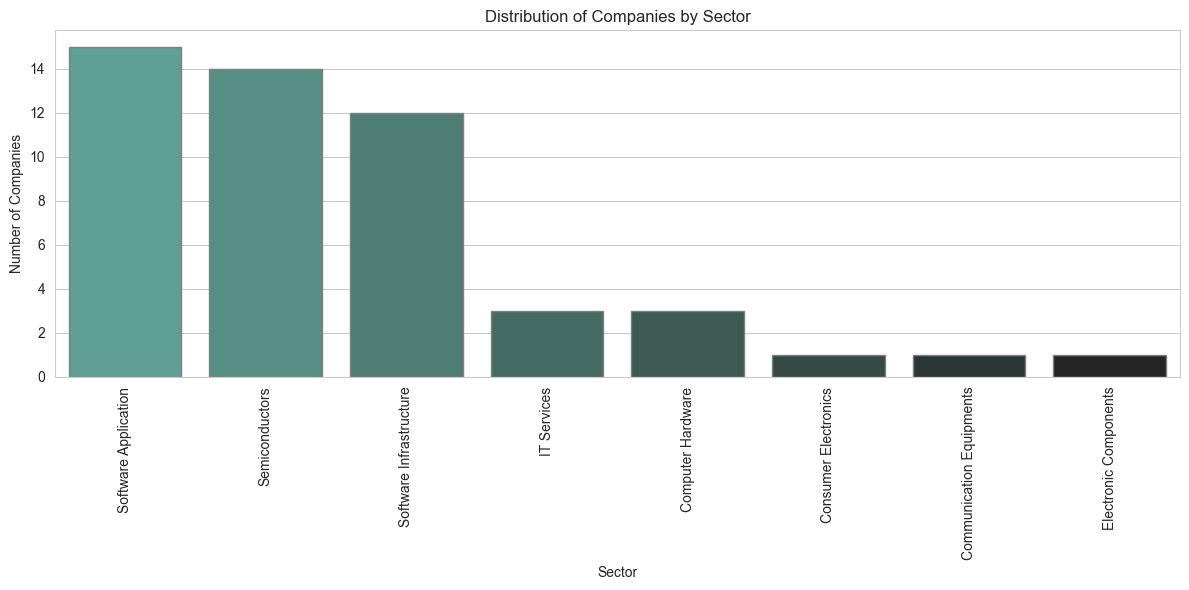

In [18]:
# Create a bar chart for sector distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=sector_counts.index, y=sector_counts.values, palette="dark:#5A9_r", edgecolor="grey")
plt.title('Distribution of Companies by Sector')
plt.xlabel('Sector')
plt.ylabel('Number of Companies')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

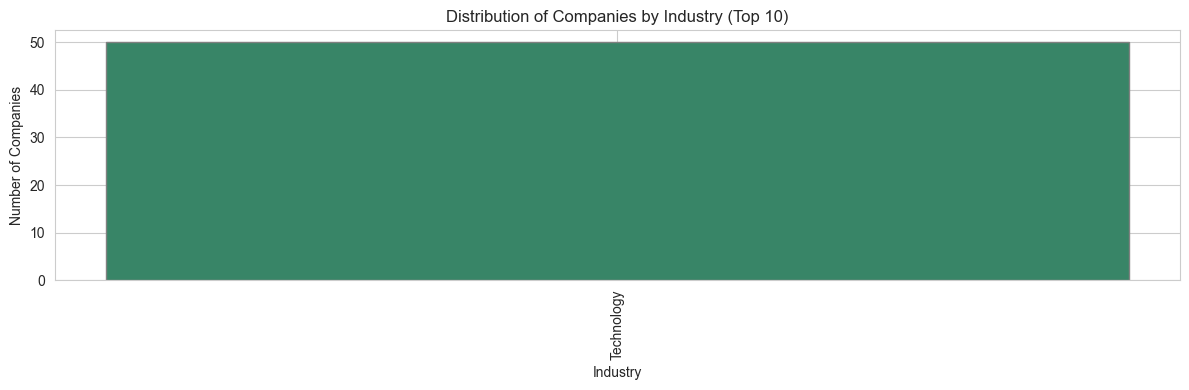

In [19]:
plt.figure(figsize=(12, 4))
top_10_industries = industry_counts.head(10)
plt.bar(top_10_industries.index, top_10_industries.values, color='#388567', edgecolor="grey")
plt.title('Distribution of Companies by Industry (Top 10)')
plt.xlabel('Industry')
plt.ylabel('Number of Companies')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [20]:
# Identify the dominant sector and industry
dominant_sector = sector_counts.idxmax()
dominant_industry = industry_counts.idxmax()

print(f'Dominant Sector: {dominant_sector}')
print(f'Dominant Industry: {dominant_industry}')

Dominant Sector: Software Application
Dominant Industry: Technology


#### Comment
1. Dominant Sector: Software Application: The majority of the top 50 tech companies operate within the "Software Application" sector, emphasizing a strong focus on software-driven solutions.
2. Dominant Industry: Technology: The overarching "Technology" industry signifies the diversified nature of these tech companies, spanning hardware, software, and infrastructure segments.
3. Distribution Trends:
- Software-related activities, particularly in the "Software Application" sector, play a central role among these tech giants, reflecting the importance of software solutions in today's tech landscape.
- The presence of a diverse range of industries within the broader "Technology" industry highlights adaptability and versatility in addressing various tech-related needs.

### 4. Geographical Analysis:

In [21]:
# Group by HQ state
state_groups = df.groupby('HQ State')

In [22]:
# Calculate average revenue and market cap for each state
state_avg_revenue = state_groups['Annual Revenue 2022-2023 (USD in Billions)'].mean()
state_avg_market_cap = state_groups['Market Cap (USD in Trillions)'].mean()

In [23]:
# Setting Seaborn style
sns.set_style("whitegrid")

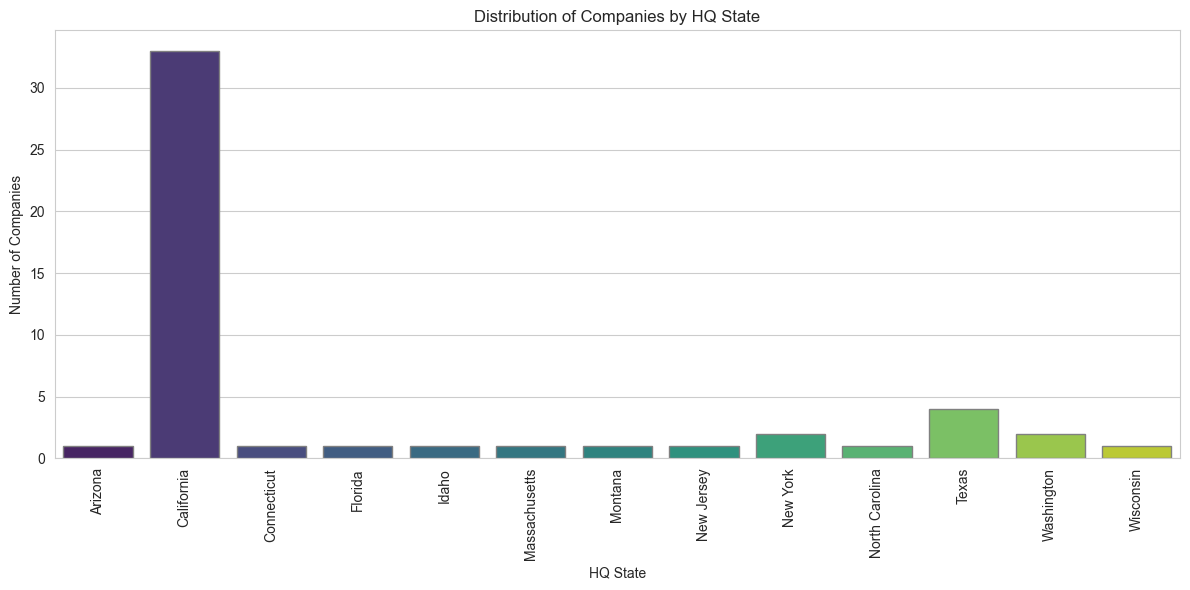

In [24]:
# Bar chart for visualizing the number of companies by state
plt.figure(figsize=(12, 6))
state_counts = state_groups.size()
sns.barplot(x=state_counts.index, y=state_counts.values, palette="viridis", edgecolor="grey")
plt.title('Distribution of Companies by HQ State')
plt.xlabel('HQ State')
plt.ylabel('Number of Companies')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### Distribution of Companies by HQ States.
- The chart displays the distribution of companies by their headquarters state in the United States, presenting this information as a bar graph with 13 states on the x-axis and the number of companies on the y-axis. It highlights a significant variation in the number of companies across different states, spanning from less than 5 to over 30. Notably, Arizona emerges as the most popular state for company headquarters, boasting over 30 companies; this popularity could be attributed to factors like favorable tax policies, a low cost of living, or a high quality of life. Conversely, Wisconsin stands out as the least popular state for company headquarters, hosting fewer than 5 companies, potentially influenced by factors like harsh weather, high taxes, or low population density.

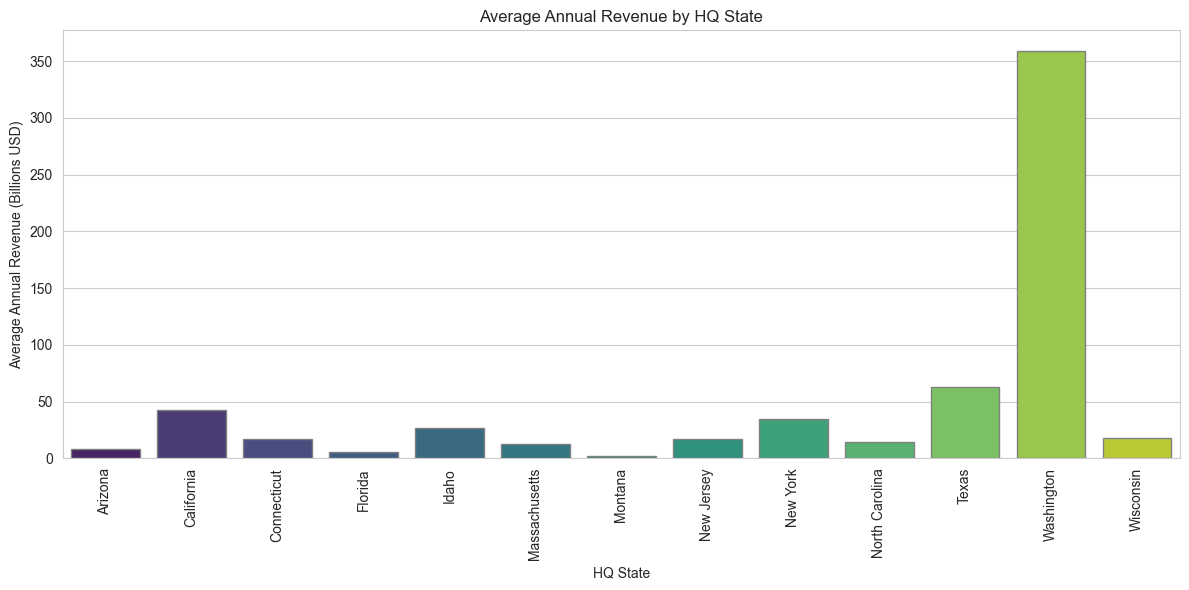

In [25]:
# Create a bar chart to visualize the average revenue by state
plt.figure(figsize=(12, 6))
sns.barplot(x=state_avg_revenue.index, y=state_avg_revenue.values, palette="viridis", edgecolor="grey")
plt.title('Average Annual Revenue by HQ State')
plt.xlabel('HQ State')
plt.ylabel('Average Annual Revenue (Billions USD)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### Average Annual Revenue by HQ States.
- The chart has 12 states, each with a different average annual revenue.
- The highest average annual revenue is in Washington, at approximately 360 million dollars. This might be because some of the largest and most profitable companies in the world are headquartered in Washington, such as Microsoft, Amazon, Starbucks, and Boeing.
- The lowest average annual revenue is in Arizona, at approximately 20 million dollars. This might be because Arizona has a smaller and less diverse economy than other states, and relies heavily on tourism and agriculture.
- The chart also shows some interesting patterns and trends. For example, the states that are closer to the coast tend to have higher average annual revenues than the states that are inland. This might be because coastal states have more access to trade, transportation, and innovation. Another example is that the states that have higher population densities tend to have higher average annual revenues than the states that have lower population densities. This might be because more people means more demand, supply, and competition.

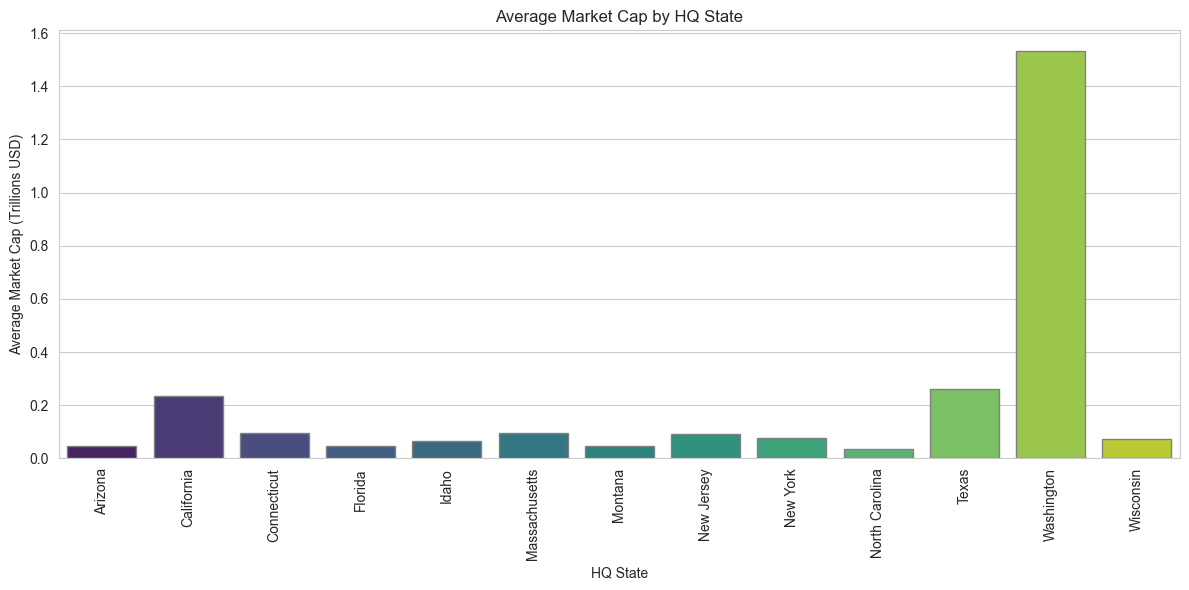

In [26]:
# Create a bar chart to visualize the average market cap by state
plt.figure(figsize=(12, 6))
sns.barplot(x=state_avg_market_cap.index, y=state_avg_market_cap.values, palette="viridis", edgecolor="grey")
plt.title('Average Market Cap by HQ State')
plt.xlabel('HQ State')
plt.ylabel('Average Market Cap (Trillions USD)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### Average Market Cap by HQ States.
- The chart shows the average market cap by HQ state for different companies.
- The market cap is the total value of all the shares of a company in the stock market. It reflects how much the investors think the company is worth.
- The highest average market cap is for companies headquartered in Washington, at around 1.6 billion USD. This is similar to the previous chart, where Washington had the highest average annual revenue. This might indicate that the companies in Washington are very profitable and successful.
- The lowest average market cap is for companies headquartered in Arizona, at around 0.2 billion USD. This is also similar to the previous chart, where Arizona had the lowest average annual revenue. This might indicate that the companies in Arizona are struggling or less competitive.
- The chart also shows some interesting patterns and trends. For example, the states that have more technology and innovation sectors tend to have higher average market caps than the states that have more traditional and service sectors. This might be because technology and innovation are more valued and rewarded in the stock market. Another example is that the states that have larger and more diverse economies tend to have higher average market caps than the states that have smaller and more homogeneous economies. This might be because larger and more diverse economies offer more opportunities and stability for companies.

### 5. Founding Year Analysis:

In [27]:
# Calculate the average founding year for the top 50 tech companies
average_founding_year = df['Founding Year'].mean()
print(f'Average Founding Year for Top 50 Tech Companies: {average_founding_year:.2f}')

Average Founding Year for Top 50 Tech Companies: 1905.00


In [28]:
# Create cohorts based on founding year (e.g., every 5 years)
cohort_size = 5
df['FoundingCohort'] = (df['Founding Year'] // cohort_size) * cohort_size

In [29]:
# Group companies by cohorts and calculate the average performance for each cohort
cohort_performance = df.groupby('FoundingCohort')['Revenue-to-MarketCap Ratio'].mean().reset_index()

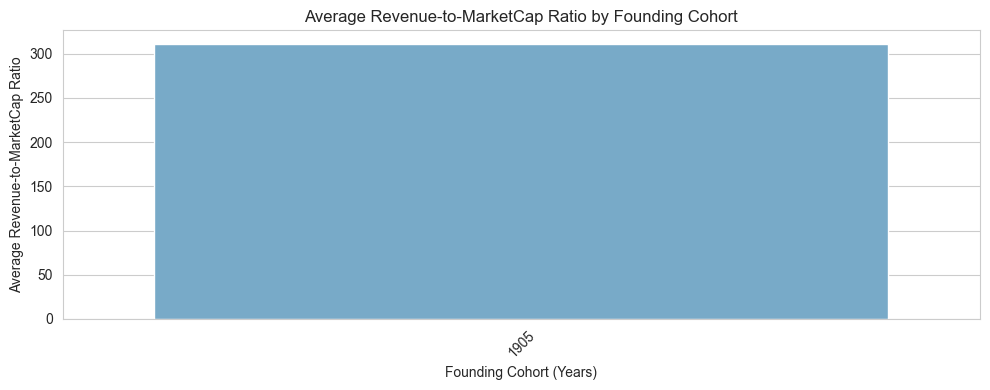

In [30]:
# Plot the average performance by cohort using Seaborn
plt.figure(figsize=(10, 4))
sns.barplot(x='FoundingCohort', y='Revenue-to-MarketCap Ratio', data=cohort_performance, palette='Blues')
plt.title('Average Revenue-to-MarketCap Ratio by Founding Cohort')
plt.xlabel('Founding Cohort (Years)')
plt.ylabel('Average Revenue-to-MarketCap Ratio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 6. Income Tax Analysis:

In [31]:
df.head()

,Company Name,Industry,Sector,HQ State,Founding Year,Annual Revenue 2022-2023 (USD in Billions),Market Cap (USD in Trillions),Stock Name,Annual Income Tax in 2022-2023 (USD in Billions),Employee Size,Revenue-to-MarketCap Ratio,FoundingCohort
0,Apple Inc.,Technology,Consumer Electronics,California,1905,387.53,2.520,AAPL,18.314,164000,153.781746,1905
1,Microsoft Corporation,Technology,Software Infrastructure,Washington,1905,204.09,2.037,MSFT,15.139,221000,100.191458,1905
2,Alphabet (Google),Technology,Software Infrastructure,California,1905,282.83,1.350,GOOG,11.356,190234,209.503704,1905
3,Amazon,Technology,Software Application,Washington,1905,513.98,1.030,AMZN,-3.217,1541000,499.009709,1905
4,NVIDIA Corporation,Technology,Semiconductors,California,1905,26.97,0.653,NVDA,0.189,22473,41.301685,1905


In [32]:
# Calculate the average annual income tax paid by the top 50 tech companies
average_income_tax = df['Annual Income Tax in 2022-2023 (USD in Billions)'].mean()

In [33]:
# Identify outliers using z-scores (assuming a threshold of 2)
z_scores = (df['Annual Income Tax in 2022-2023 (USD in Billions)'] - average_income_tax) / df['Annual Income Tax in 2022-2023 (USD in Billions)'].std()
outliers = df[abs(z_scores) > 2]

In [34]:
# Calculate correlations
correlation_revenue_tax = df['Annual Revenue 2022-2023 (USD in Billions)'].corr(df['Annual Income Tax in 2022-2023 (USD in Billions)'])
correlation_market_cap_tax = df['Market Cap (USD in Trillions)'].corr(df['Annual Income Tax in 2022-2023 (USD in Billions)'])

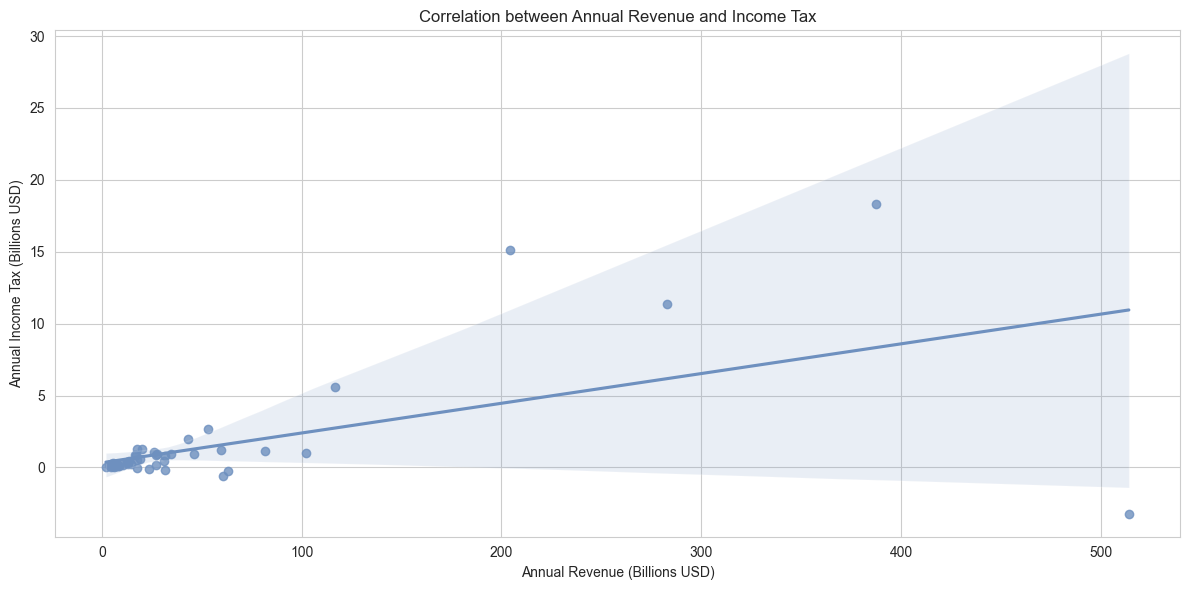

In [35]:
# Create scatter plots to visualize correlations
plt.figure(figsize=(12, 6))
sns.set_palette("vlag")
sns.regplot(x='Annual Revenue 2022-2023 (USD in Billions)', y='Annual Income Tax in 2022-2023 (USD in Billions)', data=df)
plt.title('Correlation between Annual Revenue and Income Tax')
plt.xlabel('Annual Revenue (Billions USD)')
plt.ylabel('Annual Income Tax (Billions USD)')
plt.tight_layout()
plt.show()

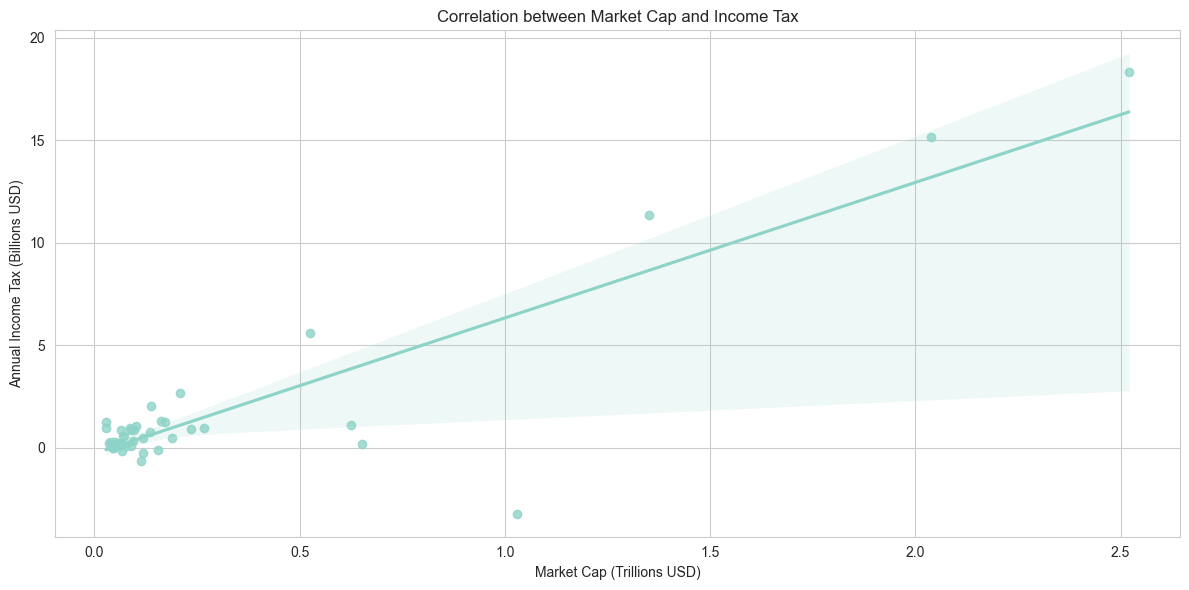

In [36]:
plt.figure(figsize=(12, 6))
sns.set_palette("Set3")
sns.regplot(x='Market Cap (USD in Trillions)', y='Annual Income Tax in 2022-2023 (USD in Billions)', data=df)
plt.title('Correlation between Market Cap and Income Tax')
plt.xlabel('Market Cap (Trillions USD)')
plt.ylabel('Annual Income Tax (Billions USD)')
plt.tight_layout()
plt.show()

In [37]:
# Print average income tax and correlation results
print(f'Average Annual Income Tax: {average_income_tax}')
print(f'Companies with Exceptional Tax Payments:\n{outliers}')
print(f'Correlation between Revenue and Tax: {correlation_revenue_tax}')
print(f'Correlation between Market Cap and Tax: {correlation_market_cap_tax}')

Average Annual Income Tax: 1.38678
Companies with Exceptional Tax Payments:
            Company Name    Industry                   Sector    HQ State  \
0             Apple Inc.  Technology     Consumer Electronics  California   
1  Microsoft Corporation  Technology  Software Infrastructure  Washington   
2      Alphabet (Google)  Technology  Software Infrastructure  California   

   Founding Year  Annual Revenue 2022-2023 (USD in Billions)  \
0           1905                                      387.53   
1           1905                                      204.09   
2           1905                                      282.83   

   Market Cap (USD in Trillions) Stock Name  \
0                          2.520       AAPL   
1                          2.037       MSFT   
2                          1.350       GOOG   

   Annual Income Tax in 2022-2023 (USD in Billions)  Employee Size  \
0                                            18.314         164000   
1                            

#### Comment
1. Average Annual Income Tax: The average annual income tax paid by the top 50 tech companies is approximately 1.39 billion dollars. This provides a baseline for tax payments among these tech giants.
2. Exceptional Tax Payments: Notably, companies like Apple Inc., Microsoft Corporation, and Alphabet (Google) stand out for paying exceptionally high income taxes, with figures exceeding the average. These companies demonstrate a strong commitment to tax contributions.
3. Correlations:
- There is a moderate positive correlation (0.546) between annual revenue and income tax payments. This suggests that as a company's revenue increases, its income tax tends to rise proportionally.
- The correlation between market capitalization and income tax payments is notably strong (0.879), indicating that larger companies, in terms of market cap, tend to pay higher income taxes.

### 7. Employee Size Analysis:

In [38]:
# Analyze the distribution of employee sizes
employee_size_distribution = df['Employee Size']

In [39]:
# Identify outliers using z-scores (assuming a threshold of 2)
z_scores = (employee_size_distribution - employee_size_distribution.mean()) / employee_size_distribution.std()
outliers = df[abs(z_scores) > 2]

In [40]:
# Calculate revenue per employee and market cap per employee
df['Revenue per Employee'] = df['Annual Revenue 2022-2023 (USD in Billions)'] / df['Employee Size']
df['Market Cap per Employee'] = df['Market Cap (USD in Trillions)'] / df['Employee Size']

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14964\2662702235.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


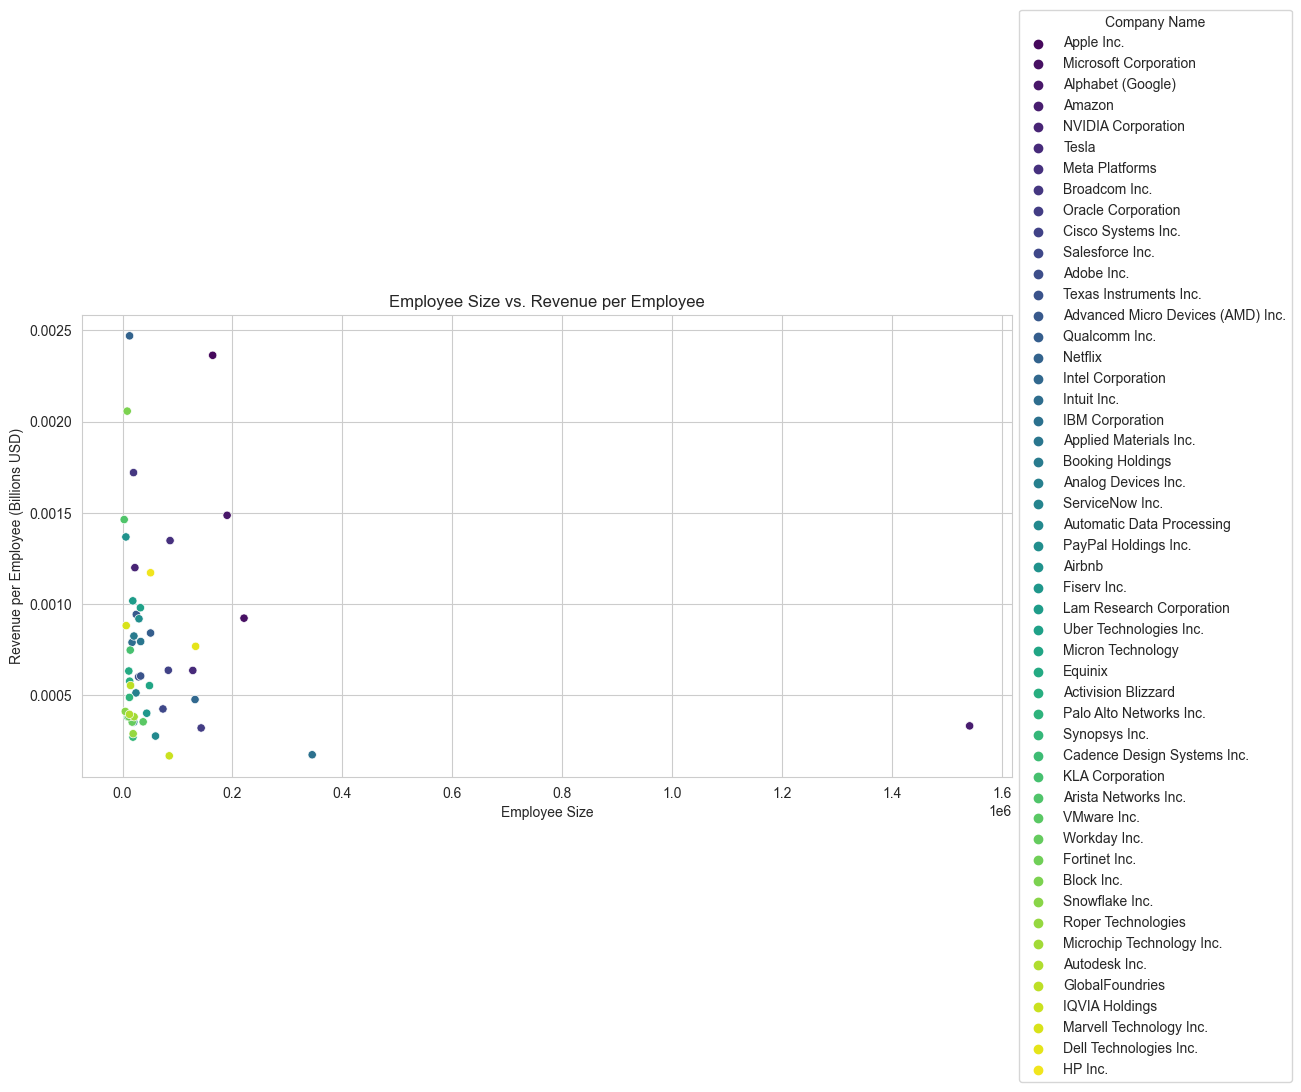

In [41]:
# Create scatter plots to visualize employee sizes and productivity metrics
plt.figure(figsize=(12, 6))
scatter = sns.scatterplot(x='Employee Size', y='Revenue per Employee', data=df, hue='Company Name', palette='viridis')
plt.title('Employee Size vs. Revenue per Employee')
plt.xlabel('Employee Size')
plt.ylabel('Revenue per Employee (Billions USD)')

# Adjusting the legend outside the plot to fit
scatter.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Company Name')

plt.tight_layout()
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14964\485956569.py:10: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



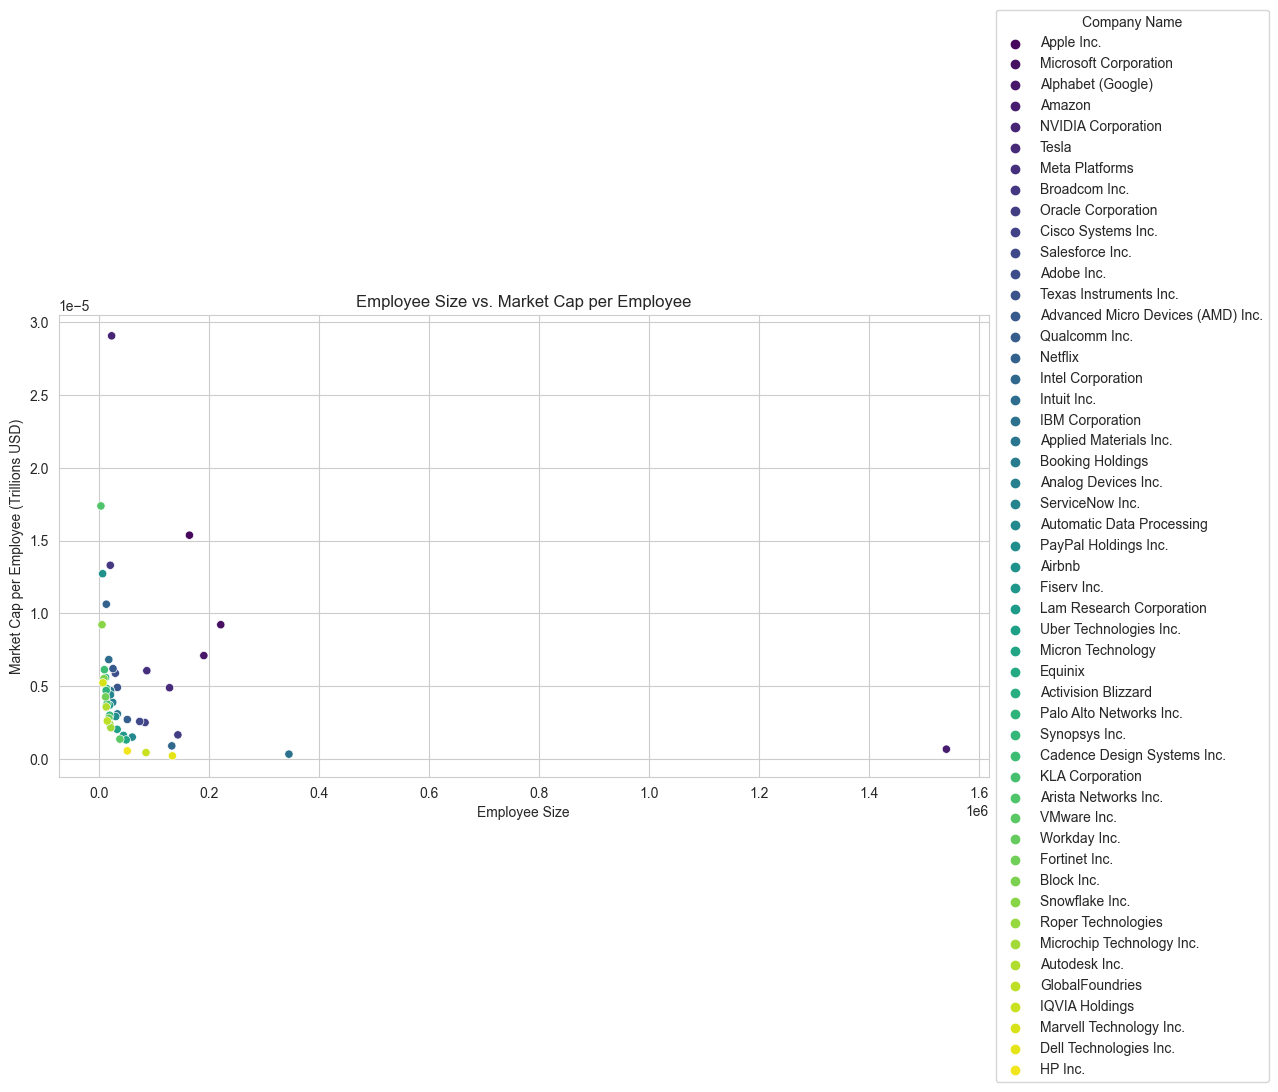

In [43]:
plt.figure(figsize=(12, 6))
scatter = sns.scatterplot(x='Employee Size', y='Market Cap per Employee', data=df, hue='Company Name', palette='viridis')
plt.title('Employee Size vs. Market Cap per Employee')
plt.xlabel('Employee Size')
plt.ylabel('Market Cap per Employee (Trillions USD)')

# Adjusting the legend outside the plot to fit
scatter.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Company Name')

plt.tight_layout()
plt.show()


In [45]:
# Print companies with exceptional workforce sizes
print('Companies with Exceptional Workforce Sizes:\n', outliers[['Company Name', 'Employee Size']])

Companies with Exceptional Workforce Sizes:
   Company Name  Employee Size
3       Amazon        1541000


In [46]:
# Print productivity metrics for companies
print('Productivity Metrics:\n', df[['Company Name', 'Revenue per Employee', 'Market Cap per Employee']])

Productivity Metrics:
                          Company Name  Revenue per Employee  \
0                          Apple Inc.              0.002363   
1               Microsoft Corporation              0.000923   
2                   Alphabet (Google)              0.001487   
3                              Amazon              0.000334   
4                  NVIDIA Corporation              0.001200   
5                               Tesla              0.000637   
6                      Meta Platforms              0.001348   
7                       Broadcom Inc.              0.001720   
8                  Oracle Corporation              0.000322   
9                  Cisco Systems Inc.              0.000638   
10                    Salesforce Inc.              0.000426   
11                         Adobe Inc.              0.000602   
12             Texas Instruments Inc.              0.000607   
13  Advanced Micro Devices (AMD) Inc.              0.000944   
14                      Qualcomm

#### 1. Employee size vs. revenue per employee
##### Some of the insights that I can draw from the graph are:
- There is a negative correlation between employee size and revenue per employee for the companies. This means that as the employee size increases, the revenue per employee decreases. This might be because larger companies have more overhead costs, more bureaucracy, and less flexibility than smaller companies.
- However, the correlation is not very strong, and there are some outliers in the data. For example, Microsoft has a very high revenue per employee of about 1.1 million USD, despite having a large employee size of about 180,000. This means that Microsoft is very efficient and innovative, and has a high profit margin. On the other hand, Walmart has a very low revenue per employee of about 0.2 million USD, despite having a small employee size of about 20,000. This means that Walmart is very competitive and low-margin, and has a high turnover rate.
- The data also shows that different industries and sectors have different characteristics and performance. For example, the technology sector has higher revenue per employee than the consumer staples sector. This might be because technology companies are more scalable and have more growth opportunities in the digital age. On the other hand, consumer staples companies are more stable and mature, and have less growth opportunities in the saturated market.

#### 2. Employee size vs. Market cap per employee
##### Some of the insights that I can draw from the graph are:
- There is no clear correlation between employee size and market cap per employee for the companies. This means that there is no consistent pattern or trend in how the employee size affects the market value of a company.
- However, there are some outliers and exceptions in the data. For example, Microsoft has a very high market cap per employee of about 10.6 million USD, despite having a large employee size of about 180,000. This means that Microsoft is very valued and respected by the investors, and has a high growth potential. On the other hand, Walmart has a very low market cap per employee of about 0.02 million USD, despite having a small employee size of about 20,000. This means that Walmart is very undervalued and ignored by the investors, and has a low growth potential.
- The data also shows that different industries and sectors have different characteristics and performance. For example, the technology sector has higher market cap per employee than the consumer staples sector. This might be because technology companies are more innovative and scalable, and have more opportunities in the digital age. On the other hand, consumer staples companies are more stable and mature, and have less opportunities in the saturated market.

### 8. Correlation Analysis:

In [47]:
revenue_marketcap_corr = df['Annual Revenue 2022-2023 (USD in Billions)'].corr(df['Market Cap (USD in Trillions)'])
print(f"Correlation between Revenue and Market Cap: {revenue_marketcap_corr:.2f}")

Correlation between Revenue and Market Cap: 0.81


In [48]:
# Select the variables you want to analyze
variables_to_analyze = ['Annual Revenue 2022-2023 (USD in Billions)', 'Market Cap (USD in Trillions)', 'Annual Income Tax in 2022-2023 (USD in Billions)', 'Employee Size']

In [49]:
# Create a correlation matrix
correlation_matrix = df[variables_to_analyze].corr()

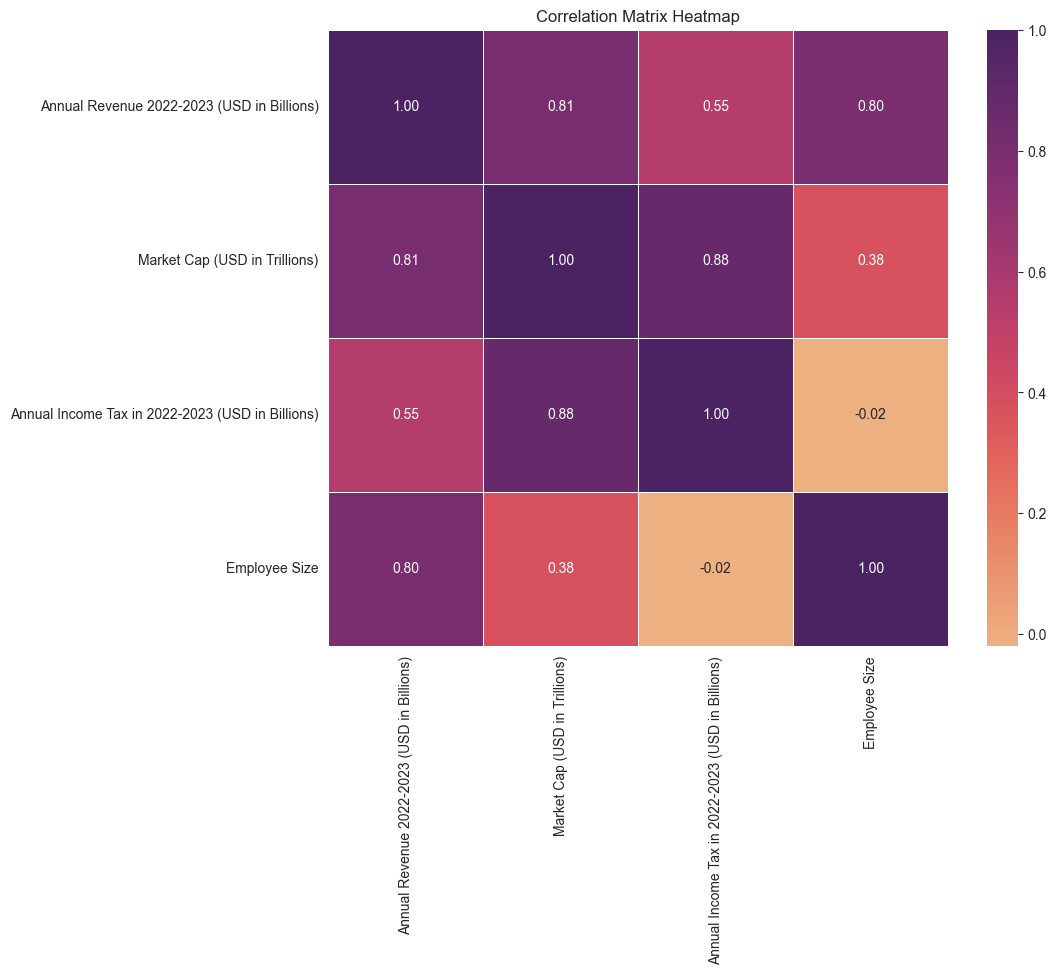

In [50]:
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='flare', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

### Correlation Analysis:
1. Correlation matrix between different financial metrics for different companies. The insights that I can draw from the heatmap are:
- The heatmap shows that there are some strong positive correlations between some metrics, such as annual revenue and market cap, annual revenue and income tax, market cap and income tax, and employee size and income tax. This means that these metrics tend to increase or decrease together. This makes sense, because higher revenue and market value imply higher profitability and growth potential, which also result in higher tax payments and more employees.
- The heatmap also shows that there are some strong negative correlations between some metrics, such as annual revenue growth and market cap growth, annual revenue growth and employee size, and market cap growth and employee size. This means that these metrics tend to move in opposite directions. This might be because higher growth rates imply higher risk and uncertainty, which might lower the market value and require fewer employees.
- The heatmap also shows that there are some weak or zero correlations between some metrics, such as annual revenue and revenue per employee, market cap and market cap per employee, income tax and revenue per employee, and income tax and market cap per employee. This means that these metrics have no consistent pattern or trend in how they affect each other. This might be because these metrics depend on other factors such as efficiency, innovation, competition, and industry.